### Импорт библиотек

In [52]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

### Загрузка данных


In [53]:
df = pd.read_csv('/content/cars.csv')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


### Подготовка данных. Очистка выбросов

In [54]:
# удаление дубликатов
df = df.drop_duplicates()

# меняем индексы строк и удаляем старые
df = df.reset_index(drop=True)

df_base = df.copy()
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
37259,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37261,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
37262,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [55]:
# очистка по пробегу
question_dist = df[(df.Year < 2021) & (df.Distance < 1100)]
df = df.drop(question_dist.index)

# слишком маленькие значения двигателя
question_engine = df[df["Engine_capacity(cm3)"] < 200]
df = df.drop(question_engine.index)

# слишком большие значения двигателя
question_engine = df[df["Engine_capacity(cm3)"] > 5000]
df = df.drop(question_engine.index)

# слишком малые цены
question_price = df[(df["Price"] < 101)]
df = df.drop(question_price.index)
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000.0,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
37258,Volkswagen,Passat,2016.0,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37262,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


### *Задание 1.* **Визуализация данных с использованием библиотеки Pandas**

In [56]:
# у нас есть два вида данных
cat_columns = [] # категориальные
num_columns = [] # и числовые данные

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price'] 
 Число столблцов =  4


**Гистограммы для числовых признаков**

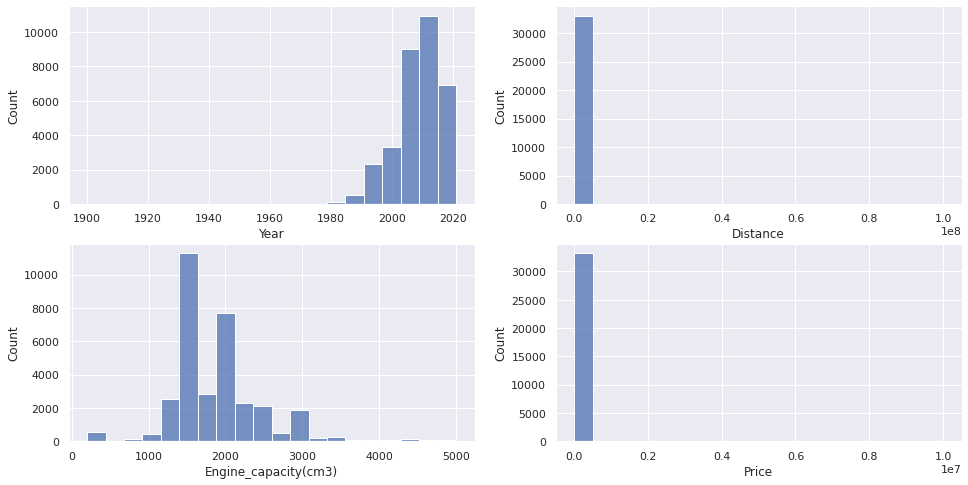

In [57]:
width = 2 # с двоечкой выглядит наиболее
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

In [58]:
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
5,Mercedes,Vito,2000.0,Microvan,300000.0,2200.0,Diesel,Manual,3490.0
...,...,...,...,...,...,...,...,...,...
37258,Volkswagen,Passat,2016.0,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0
37259,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
37260,Dacia,Logan Mcv,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
37262,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


<Figure size 1080x1080 with 0 Axes>

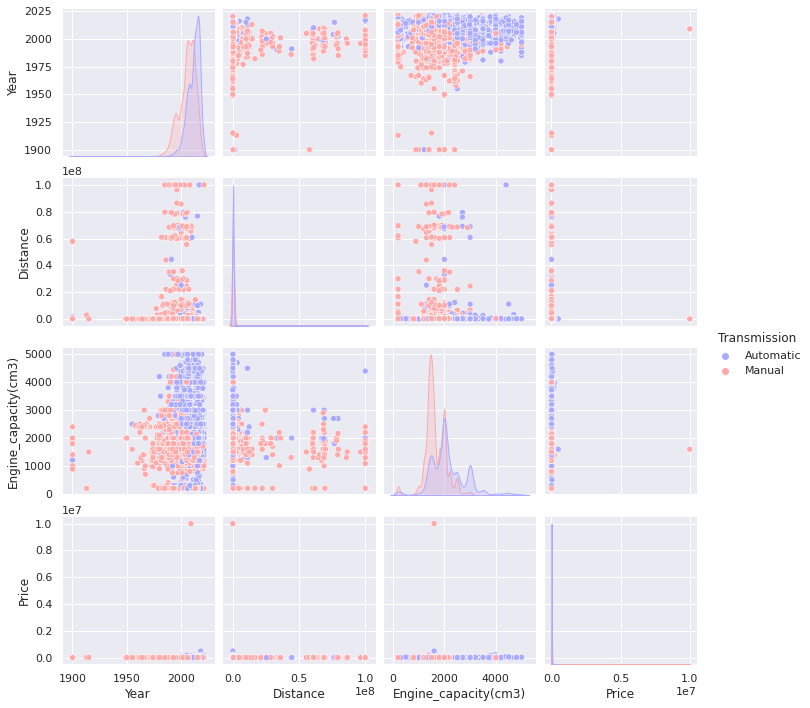

In [59]:
fig = plt.figure(figsize=(15,15))
sns.pairplot(data = df, hue ='Transmission', palette = 'bwr',);

**Три "новых" визуализации**

<Figure size 720x504 with 0 Axes>

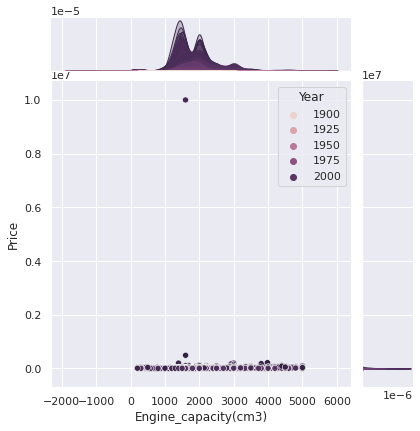

In [60]:
plt.figure(figsize=(10,7))
sns.jointplot(data=df, x="Engine_capacity(cm3)", y="Price", hue="Year")

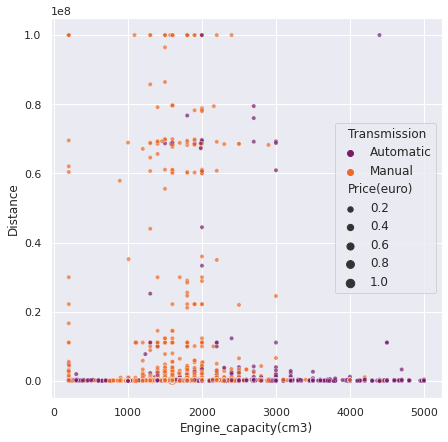

In [31]:
plt.figure(figsize=(7,7)) # цвета ада
sns.scatterplot(data=df, x="Engine_capacity(cm3)", y="Distance", hue="Transmission", size = "Price", alpha = 0.7, palette='inferno');

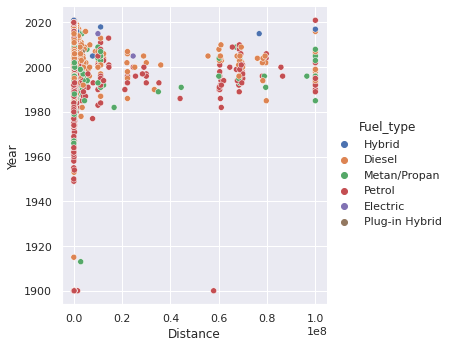

In [38]:
sns.relplot(data=df, x="Distance", y="Year", hue="Fuel_type")

### Задание 2. Добавить в модель дополнительные признаки на основе имеющихся

Ввела квантильные категории для столбца удельный пробег за год (km_year)

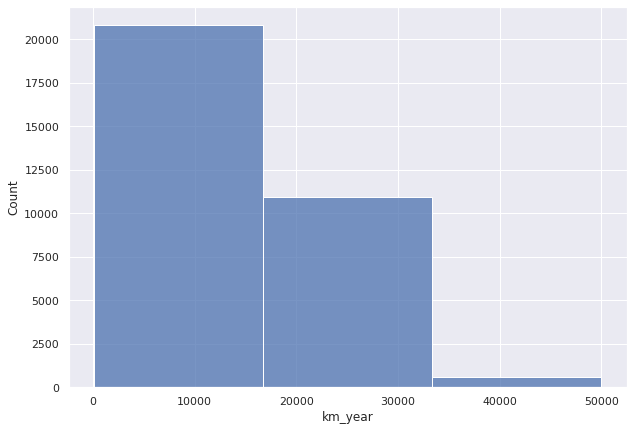

In [42]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

plt.figure(figsize=(10,7))
sns.histplot(data=df,
            x='km_year',bins = 3); # Автомобилей «с небольшим пробегом» оказалось больше, чем «со средним пробегом» и «с большим пробегом»

**«Умная» замена на редкие категории**

In [61]:
df[num_columns].nunique()

Year                      68
Distance                8481
Engine_capacity(cm3)     620
Price                   1735
dtype: int64

In [62]:
counts = df.Price.value_counts()

counts

3500.0     397
2500.0     391
4500.0     363
5500.0     361
3000.0     357
          ... 
11898.0      1
12001.0      1
7780.0       1
53700.0      1
1666.0       1
Name: Price, Length: 1735, dtype: int64

In [66]:
counts.median()

3.0

In [ ]:
counts[counts<100]